# 1_연도별 외래관광객 입국 수 추이

### 순서
1. 데이터 불러오기
    - excel파일을 데이터프레임 형식으로 불러오기
    
    
2. 데이터 정리
    - 필요한 데이터만 추출
    - 한눈에 보기 쉽게 정리
    
    
3. 그래프 생성
    - x축을 년도, y축을 인원으로 선 그래프 생성

### 필요한 모듈 import

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# 시각화
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 1. 데이터 불러오기

### 엑셀파일 불러오기 

In [30]:
df = pd.read_excel('data/1/1_입국_20072022.xls')
df

,해외여행객,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,계
0,NaN,인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명)
1,계,6448240,6890841,7817533,8797658,9794796,11140028,12175550,14201516,13231651,17241823,13335758,15346879,17502756,2519118,967003,3198017,160609167


- 데이터 확인하기

In [31]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   해외여행객   1 non-null      object
 1   2007년   2 non-null      object
 2   2008년   2 non-null      object
 3   2009년   2 non-null      object
 4   2010년   2 non-null      object
 5   2011년   2 non-null      object
 6   2012년   2 non-null      object
 7   2013년   2 non-null      object
 8   2014년   2 non-null      object
 9   2015년   2 non-null      object
 10  2016년   2 non-null      object
 11  2017년   2 non-null      object
 12  2018년   2 non-null      object
 13  2019년   2 non-null      object
 14  2020년   2 non-null      object
 15  2021년   2 non-null      object
 16  2022년   2 non-null      object
 17  계       2 non-null      object
dtypes: object(18)
memory usage: 416.0+ bytes


In [32]:
# null값 확인하기
df.isnull().sum()

해외여행객    1
2007년    0
2008년    0
2009년    0
2010년    0
2011년    0
2012년    0
2013년    0
2014년    0
2015년    0
2016년    0
2017년    0
2018년    0
2019년    0
2020년    0
2021년    0
2022년    0
계        0
dtype: int64

---------

## 2. 데이터 정리

### 필요한 데이터만 추출

 - 불필요한 행 삭제

In [33]:
# 필요없는 행 삭제 (0번행)
df = df.drop(index=0, axis=0)
df

,해외여행객,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,계
1,계,6448240,6890841,7817533,8797658,9794796,11140028,12175550,14201516,13231651,17241823,13335758,15346879,17502756,2519118,967003,3198017,160609167


 - 불필요한 열 삭제

In [34]:
# 필요없는 열 삭제 (총계 컬럼 삭제)
df = df.drop(['해외여행객','계'], axis=1)
df

,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,6448240,6890841,7817533,8797658,9794796,11140028,12175550,14201516,13231651,17241823,13335758,15346879,17502756,2519118,967003,3198017


### 한 눈에 보기 쉽게 정리

- 인덱스명 변경

In [35]:
# 인덱스명 변경 (1 -> 인원(명))
df= df.rename(index={1:'인원(명)'})
df

,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
인원(명),6448240,6890841,7817533,8797658,9794796,11140028,12175550,14201516,13231651,17241823,13335758,15346879,17502756,2519118,967003,3198017


- 행,열 전환

In [36]:
# 행과열을 Trans하여 그래프로 보기 쉽게 나타냄
df = df.T
df

,인원(명)
2007년,6448240
2008년,6890841
2009년,7817533
2010년,8797658
2011년,9794796
2012년,11140028
2013년,12175550
2014년,14201516
2015년,13231651
2016년,17241823


---------

## 3. 그래프 생성

### x축: 년도, y축: 인원
- format함수를 이용해 값의 추이를 보기 쉽게 나타냄
- y축의 최솟값 최대값 지정

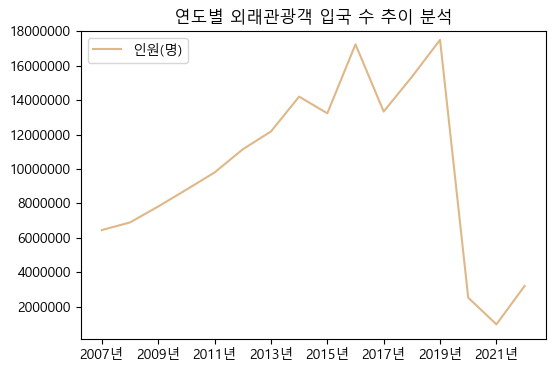

In [37]:
# 그래프 생성
df.plot(figsize=(6,4),title = '연도별 외래관광객 입국 수 추이 분석', color='burlywood')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.ylim([100000,18000000])
pd.options.display.float_format = '{:.8f}'.format

---------